<font size="6"><b><ul><ul> SCALER - Clustering in Learner Profiling

    
<br>
    <hr><br>


<div style="font-size: 20px; text-align: justify;">Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts.  It is a product by InterviewBit.<br><br>
You are working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database. You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.

    

<br><br></div>

<div style="font-size: 20px; text-align: justify;">Following are the columns in the dataset.<br><br>

<ul style="list-style-type: circle;"><li>  ‘Unnamed 0’ - Index of the dataset<br><br>
<li>	Email_hash - Anonymised Personal Identifiable Information (PII)<br><br>
<li>	Company_hash - This represents an anonymized identifier for the company, which is the current employer of the learner.<br><br>
<li>	orgyear - Employment start date<br><br>
<li>	CTC - Current CTC<br><br>
<li>  Job_position - Job profile in the company<br><br>
<li>  CTC_updated_year - Year in which CTC got updated (Yearly increments, Promotions)<br><br></ul>

Aim is to leverage data science and unsupervised learning, particularly clustering
techniques so that Scaler can group learners with similar profiles, especially in terms of their current roles, companies, and experience aiding in delivering a more personalized learning journey.
    

    
<br><br>
</div>


<div style="font-size: 20px; text-align: justify;"><br>1. Basic data cleaning and exploration:
   <br><br>
    
<ul>a.Importing data and finding the shape.  <br><br></div>

In [508]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r"C:\Users\devip\Desktop\Scaler projects\Scaler clustering\scaler_clustering.csv")
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [509]:
df.columns


Index(['Unnamed: 0', 'company_hash', 'email_hash', 'orgyear', 'ctc',
       'job_position', 'ctc_updated_year'],
      dtype='object')

In [510]:
df.shape

(205843, 7)

In [511]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153281 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


<div style="font-size: 20px; text-align: justify;"><br><ul>Dropping column Unnamed as it affects the model. <br></div>

In [512]:
df=df.drop('Unnamed: 0',axis=1)

<div style="font-size: 20px; text-align: justify;"><br><ul>Converting columns orgyear and ctc_updated_year to datetime. <br></div>

In [513]:
# df['orgyear'] = df['orgyear'].astype(int)
# df['ctc_updated_year'] = df['ctc_updated_year'].astype(int)

# df['orgyear'] = pd.to_datetime(df['orgyear'],format='%Y')
# df['ctc_updated_year'] = pd.to_datetime(df['ctc_updated_year'],format='%Y')

<br><br><div style="font-size: 20px; text-align: justify;">b. Checking for null values. <br><br></div>

In [514]:
df.isna().sum(axis=0)

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

In [515]:
(df.isna().sum(axis=0)/len(df))*100

company_hash         0.021376
email_hash           0.000000
orgyear              0.041779
ctc                  0.000000
job_position        25.534995
ctc_updated_year     0.000000
dtype: float64

<div style="font-size: 20px; text-align: justify;"><br><br><ul>Columns 'job_position' is having 25% missing values. 'orgyear' and 'company_hash' are also having null values. <br><br></div>

<br>
<div style="font-size: 20px; text-align: justify;">c. Describing the dataset
<br><br></div>

In [516]:
df.describe()

,orgyear,ctc,ctc_updated_year
count,205757.000000,2.058430e+05,205843.000000
mean,2014.882750,2.271685e+06,2019.628231
std,63.571115,1.180091e+07,1.325104
min,0.000000,2.000000e+00,2015.000000
25%,2013.000000,5.300000e+05,2019.000000
50%,2016.000000,9.500000e+05,2020.000000
75%,2018.000000,1.700000e+06,2021.000000
max,20165.000000,1.000150e+09,2021.000000


In [517]:
df.describe(include=['object','category'])

,company_hash,email_hash,job_position
count,205799,205843,153281
unique,37299,153443,1017
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Backend Engineer
freq,8337,10,43554


<div style="font-size: 20px; text-align: justify;"><br><br>d. Checking for duplicate rows.<br><br></div>

In [518]:
df[df.duplicated()]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
97138,wtqtzwt xzw,bb8e4b09544daf1bfc8c7bb9a9ae1fee35490cf3f321b8...,2014.0,1000000,FullStack Engineer,2019.0
98085,2020,6ad3e6ab27462c2c7428fa5d51405933335341d4d969b5...,2020.0,720000,NaN,2019.0
102600,voxvz uvxzno,c7fac937a34f7ae432ff1d77466eb7ea6cf25dfd5ebcca...,2020.0,1280000,NaN,2019.0
109324,wgbwvon mhoxztoo,0442a51ef5080d7d40721c007131a1d5bdeabae2c1b153...,2016.0,700000,NaN,2019.0
111354,uyxrxuo xzzgcvnxgz wvbuho,704d69965035d1c341b06fc5d83bf1b714f1625c0cf271...,2017.0,850000,iOS Engineer,2019.0
111521,aqggb ntwyzgrgsj,df81dac132d66a42a0c71a4799e1040731738e542c81ff...,2017.0,1270000,FullStack Engineer,2019.0
115241,rgfto wgbuvzxto xzw,ea363e930dabe0fbb63438e07775af3cb3b32639947c47...,2017.0,1100000,Backend Engineer,2019.0
117246,xatbxv,f451ceee50b1bfa3dc749c6aa8634ab3851a4ab961b003...,2019.0,640000,NaN,2019.0
117549,exzdtqv,e7df851527dd6f8ec95d5e13d9fb2a7255380245b808e3...,2020.0,1500000,NaN,2020.0
120371,avnvbtnxwv ogrhnxgzo uqxcvnt rxbxnta,15d7dd6801fb7cb980e77c420dd9bef5773e7ef57f510c...,2016.0,1300000,Backend Engineer,2020.0


<div style="font-size: 20px; text-align: justify;"><br><br>Removing the duplicate columns by keeping the first occurance.<br><br></div>

In [519]:
df.drop_duplicates(keep='first', inplace=True)


In [520]:
df[df.duplicated()]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year


<br><hr><br><br>

<div style="font-size: 20px; text-align: justify;"><br><br>2. Aggregating the dataset on email_hash .<br><br></div>

<div style="font-size: 20px; text-align: justify;"><ul><br><br> We aggregate data on column email_hash in order to remove multiple occurrences of same learner.<br><br></div>

In [521]:
df['email_hash'].value_counts().sort_values(ascending=False)

bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66     8
                                                                    ..
a49d8424729be9425011b9e53bcab125cf6e385b65ee4edfcf25e7581f802aa7     1
78f62ca802baabaa230eac34ce78765ec3be812c078ff98baf66ac7f937c5944     1
9ac472515f9f00729b68694c0bfe27e54be55586a371d400ed3d691d9acc2edb     1
3b5209d0fb722e792d101adeee8717e130d053c0286595b0ea574f2b8cc2d51d     1
6fbfc38571d9ffe03d3cc3bc760a45542216b1923ccadc9e3780e7ff95beb154     1
Name: email_hash, Length: 153443, dtype: int64

In [522]:

from scipy.stats import mode



def mode_data(series):
    filtered_series = series.dropna()
    if not filtered_series.empty:
        return filtered_series.mode()[0]
    return np.nan

if __name__ == "__main__":
  
    df_agg = df.groupby('email_hash').agg({
        'ctc': 'max',
        'company_hash': mode_data,
        'job_position': mode_data,
        'orgyear': 'min',
        'ctc_updated_year': 'max'
    })








In [523]:
df_agg=df_agg.reset_index()
df_agg

,email_hash,ctc,company_hash,job_position,orgyear,ctc_updated_year
0,00003288036a44374976948c327f246fdbdf0778546904...,3500000,bxwqgogen,Backend Engineer,2012.0,2019.0
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,250000,nqsn axsxnvr,Backend Engineer,2013.0,2020.0
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,1300000,gunhb,FullStack Engineer,2021.0,2019.0
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2000000,bxwqgotbx wgqugqvnxgz,FullStack Engineer,2004.0,2021.0
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,3400000,fvrbvqn rvmo,NaN,2009.0,2018.0
...,...,...,...,...,...,...
153438,fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...,3529999,tqxwoogz ogenfvqt wvbuho,QA Engineer,2004.0,2019.0
153439,fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...,1600000,trnqvcg,NaN,2015.0,2018.0
153440,fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...,900000,znn avnv srgmvr atrxctqj otqcxwto,Devops Engineer,2014.0,2019.0
153441,ffff49f963e4493d8bbc7cc15365423d84a767259f7200...,700000,zwq wgqugqvnxgz,FullStack Engineer,2020.0,2020.0


In [524]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153443 entries, 0 to 153442
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   email_hash        153443 non-null  object 
 1   ctc               153443 non-null  int64  
 2   company_hash      153411 non-null  object 
 3   job_position      133219 non-null  object 
 4   orgyear           153365 non-null  float64
 5   ctc_updated_year  153443 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 7.0+ MB


In [525]:
(df_agg.isna().sum(axis=0)/len(df_agg))*100

email_hash           0.000000
ctc                  0.000000
company_hash         0.020855
job_position        13.180139
orgyear              0.050833
ctc_updated_year     0.000000
dtype: float64

<br><br><hr><br><br>

<div style="font-size: 20px; text-align: justify;">3. Feature Engineering steps. <br><br></div>

<div style="font-size: 20px; text-align: justify;"><ul><br>a. Creating column Experience . <br><br></div>

<div style="font-size: 20px; text-align: justify;"><ul><br>A column 'Experience' is created which is the difference between current year and orgyear.<br><br>
As the column orgyear is having very extreme values, so dropping rows having extreme values.</div>

In [526]:
df_agg[(df_agg['orgyear'] < 1980) | (df_agg['orgyear'] > 2024)]

,email_hash,ctc,company_hash,job_position,orgyear,ctc_updated_year
3018,050a5f7e04009ad2554fe374e4512d9dbfd30450410666...,150000,lvj vbmt,Devops Engineer,2025.0,2021.0
3991,069308440811d578c817c05392f97e8919baac6aa12aa3...,2900000,vaxnjv mxqrv wvuxnvr,Data Scientist,1.0,2019.0
6402,0a5e691a0f8c2c06862ef19d43dc11c22f462f800db26b...,800000,vxqvoxv,NaN,0.0,2019.0
7927,0ceab34736c0ba43f541a9d62f5f8ffe33f4c306ea73a5...,270000,otwhqt mrxzp,SDET,2026.0,2021.0
15444,1978da71c14333352d051bfb6054904770b70cecce389d...,400000,vzshrvq atcqrgutq,Devops Engineer,91.0,2021.0
...,...,...,...,...,...,...
138035,e66b927f4ee3bd0d7202bbd35486d23d68555fc03dcd54...,140000,hzxctqoxnj ge zgqny ntdvo,Engineering Leadership,1970.0,2020.0
138492,e725ad631cdc4c57a354f59c98b6441f0672c6b7bb8adb...,730000,bvzyvnnvz voogwxvnto,Backend Engineer,83.0,2019.0
144306,f0c712df5b5e6698a7558311dff87d2b2b4aaa12839915...,100000000,otre tburgjta,Other,2029.0,2021.0
147725,f648fa217922f5a36b510df6346a2041a3483e21289069...,1200000,mrvwpmhwp,NaN,2101.0,2021.0


In [527]:


df_agg=df_agg.loc[(df_agg['orgyear'] >= 1980) & (df_agg['orgyear'] <= 2024)].copy()

df_agg.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 153285 entries, 0 to 153442
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   email_hash        153285 non-null  object 
 1   ctc               153285 non-null  int64  
 2   company_hash      153253 non-null  object 
 3   job_position      133102 non-null  object 
 4   orgyear           153285 non-null  float64
 5   ctc_updated_year  153285 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 8.2+ MB


In [528]:
df_agg['orgyear'].describe()

count    153285.000000
mean       2014.808109
std           4.357146
min        1981.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2024.000000
Name: orgyear, dtype: float64

In [529]:
df_agg.loc[:,'Experience']=2024-df_agg['orgyear']


In [530]:
df_agg['Experience'].describe()

count    153285.000000
mean          9.191891
std           4.357146
min           0.000000
25%           6.000000
50%           8.000000
75%          11.000000
max          43.000000
Name: Experience, dtype: float64

<div style="font-size: 20px; text-align: justify;"><br><br><br>b. Creating column Income bins . <br><br></div>

In [531]:
df_agg['job_position']=df_agg['job_position'].str.lower()
df_agg['Income_bin']=df_agg['ctc'].apply(lambda x: 'Low' if x<1000000 else ('Medium' if x<3000000 else 'High'))

<div style="font-size: 20px; text-align: justify;"><br><br><br>If CTC is below 1000000 it is marked as category 'Low', if income is below 3000000 its 'Medium' and employees having income greater than 3000000 is included in income bin 'High'. <br><br></div>

<div style="font-size: 20px; text-align: justify;"><br><br><br>c. Creating column Job_position_prominance . <br><br></div>

<div style="font-size: 20px; text-align: justify;"><br><ul>If mean CTC of the job_position is below 1500000 it is marked as category 'Less_prominant', if income is below 4000000 its 'Medium_prominant' and job positions having income greater than 4000000 is included in  bin 'Highly prominant'.</ul> <br><br></div>

In [532]:
job_ctc_mean = df_agg.groupby('job_position').ctc.mean()


df_agg['Job_prominance'] = df_agg['job_position'].map(job_ctc_mean)


df_agg['Job_prominance'] = df_agg['Job_prominance'].apply(lambda x: 'Less_prominant' if pd.notna(x) and x < 1500000 else 
              ('Medium_prominant' if pd.notna(x) and x < 4000000 else  ('Highly_prominant' if pd.notna(x) else np.nan)))

df_agg.head()


,email_hash,ctc,company_hash,job_position,orgyear,ctc_updated_year,Experience,Income_bin,Job_prominance
0,00003288036a44374976948c327f246fdbdf0778546904...,3500000,bxwqgogen,backend engineer,2012.0,2019.0,12.0,High,Medium_prominant
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,250000,nqsn axsxnvr,backend engineer,2013.0,2020.0,11.0,Low,Medium_prominant
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,1300000,gunhb,fullstack engineer,2021.0,2019.0,3.0,Medium,Medium_prominant
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2000000,bxwqgotbx wgqugqvnxgz,fullstack engineer,2004.0,2021.0,20.0,Medium,Medium_prominant
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,3400000,fvrbvqn rvmo,NaN,2009.0,2018.0,15.0,High,NaN


In [533]:
df_agg[df_agg['Job_prominance']=='Less_prominant']

,email_hash,ctc,company_hash,job_position,orgyear,ctc_updated_year,Experience,Income_bin,Job_prominance
8,00037a2e4fcfe2830d91270102aaaf105a324a3ce17075...,1800000,ko,sdet,2012.0,2021.0,12.0,Medium,Less_prominant
20,000abcc4ba53bffb10a940bbb1a02dbd641ac9248849ac...,1400000,yxpt btootzstq,sdet,2015.0,2018.0,9.0,Medium,Less_prominant
41,001061f980d1ac33489c1f85b1587af347bf0203ee5321...,720000,ftrro evqsg,sdet,2015.0,2019.0,9.0,Low,Less_prominant
105,002c8de23775649daec5935d73d82100ae46b594c2531a...,620000,exzvonqv mvzsvrgqt,sdet,2014.0,2019.0,10.0,Low,Less_prominant
109,002f81f3350685a057d429b173fca3589384be9338e163...,320000,wvustbxzx,sdet,2016.0,2017.0,8.0,Low,Less_prominant
...,...,...,...,...,...,...,...,...,...
153131,ff6d5467e9abf203252ac540e360fe87239efb3a3d47d5...,640000,qtertdxo ojontbo xzw,sdet,2016.0,2019.0,8.0,Low,Less_prominant
153139,ff70bb2130aeb865572574048d01d14b5da1fde50c5c67...,2000000,vagmt,sdet,2011.0,2020.0,13.0,Medium,Less_prominant
153286,ffb57767385843c9b24b1122d7daf807afab1add9df31f...,610000,ftrro evqsg wtznqt,sdet,2014.0,2019.0,10.0,Low,Less_prominant
153392,ffe7dca601ec396d1dba95854a7b8554539eab53a77751...,300000,w tast ntwyzgrgsj ucn rna,sdet,2014.0,2017.0,10.0,Low,Less_prominant


<div style="font-size: 20px; text-align: justify;"><br><br><br>d. Creating column current_year_ctc_updated . <br><br></div>

<div style="font-size: 20px; text-align: justify;"><br><ul>Flag is 1 for employees having ctc updated in the latest year in dataset which is 2021 else 0.</ul> <br><br></div>

In [534]:
df_agg['current_year_ctc_updated']=df_agg['ctc_updated_year'].apply(lambda x: 1 if x==2021 else 0)

<br><br><hr><br>

<div style="font-size: 20px; text-align: justify;"><br><br>4. Use Non-graphical and graphical analysis for getting insights about variables.</div><br><br>

<br><br><div style="font-size: 20px; text-align: justify;"><ul>a. Categorical columns analysis.<br><br></div>

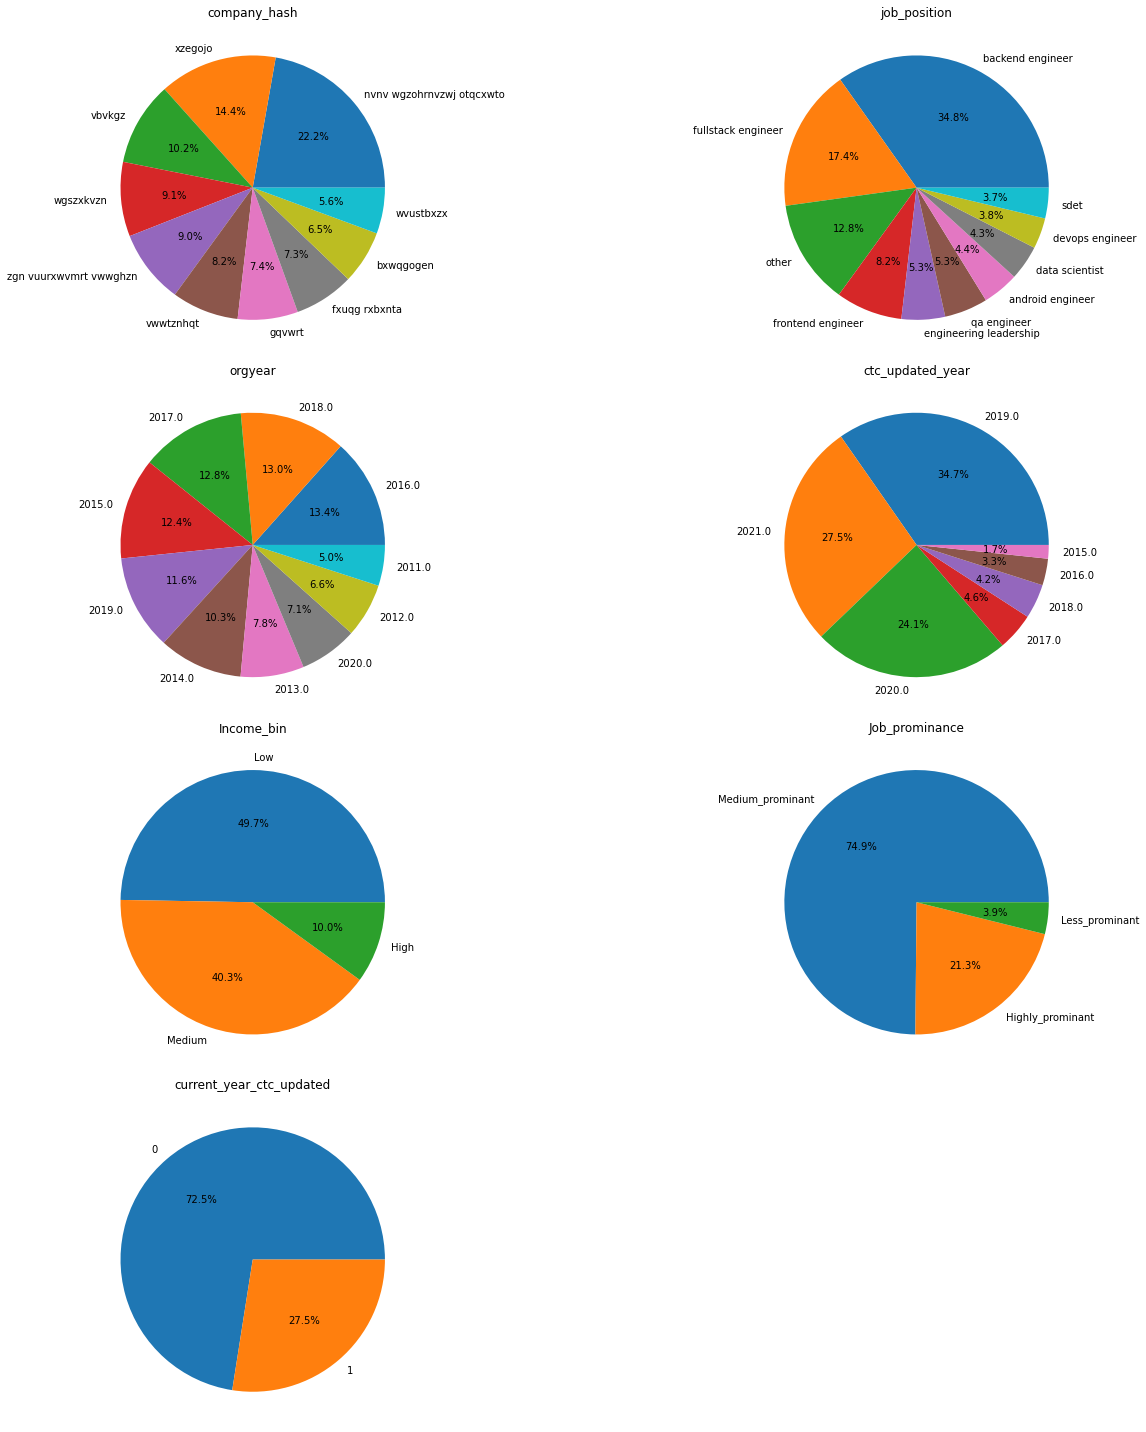

In [535]:
from IPython.display import display
no=1
cat_cols=['company_hash', 'job_position', 'orgyear', 'ctc_updated_year','Income_bin','Job_prominance','current_year_ctc_updated']
#,'Income_bin','Job_prominance','current_year_ctc_updated'
plt.figure(figsize=(20,20))
for i in cat_cols:
    plt.subplot(4,2,no)
        
    plt.title(i)
    datacol=df_agg.groupby(i).size().sort_values(ascending=False).head(10)

    
    plt.pie(x=datacol,labels=datacol.index,autopct='%1.1f%%')

    #display(datacol.to_frame(name='count').reset_index())
    #print('\n\n')
    no+=1
plt.tight_layout()
plt.show()
    
    

,company_hash,count
0,nvnv wgzohrnvzwj otqcxwto,5330
1,xzegojo,3458
2,vbvkgz,2458
3,wgszxkvzn,2183
4,zgn vuurxwvmrt vwwghzn,2163
5,vwwtznhqt,1964
6,gqvwrt,1766
7,fxuqg rxbxnta,1753
8,bxwqgogen,1570
9,wvustbxzx,1348


,job_position,count
0,backend engineer,40068
1,fullstack engineer,20039
2,other,14752
3,frontend engineer,9389
4,engineering leadership,6133
5,qa engineer,6104
6,android engineer,5111
7,data scientist,4914
8,devops engineer,4328
9,sdet,4317


,orgyear,count
0,2016.0,17332
1,2018.0,16828
2,2017.0,16557
3,2015.0,15982
4,2019.0,15000
5,2014.0,13281
6,2013.0,10013
7,2020.0,9180
8,2012.0,8555
9,2011.0,6446


,ctc_updated_year,count
0,2019.0,53188
1,2021.0,42121
2,2020.0,36943
3,2017.0,7025
4,2018.0,6464
5,2016.0,4993
6,2015.0,2551


,Income_bin,count
0,Low,76213
1,Medium,61763
2,High,15309


,Job_prominance,count
0,Medium_prominant,99638
1,Highly_prominant,28302
2,Less_prominant,5162


,current_year_ctc_updated,count
0,0,111164
1,1,42121


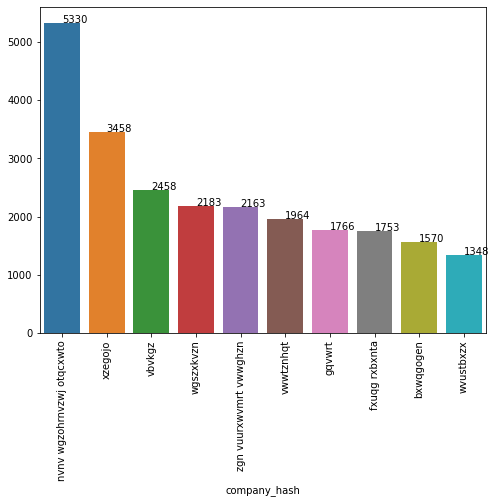

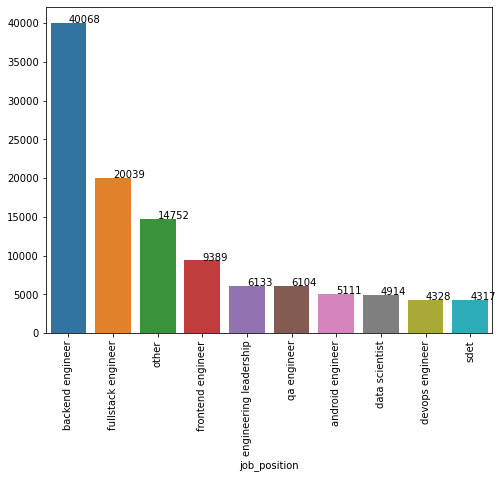

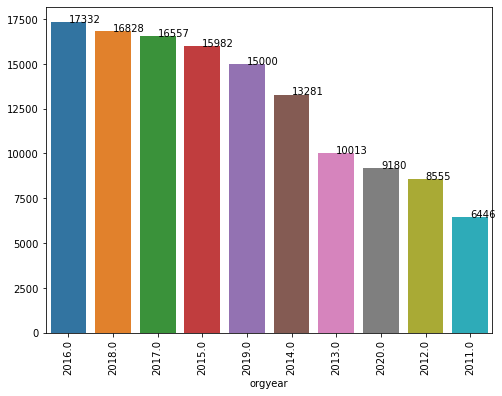

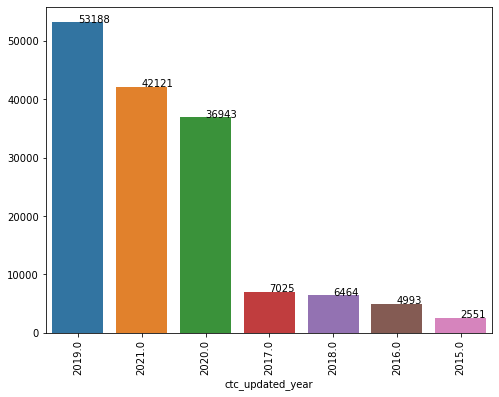

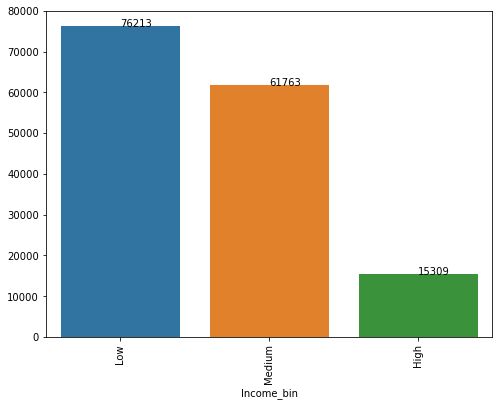

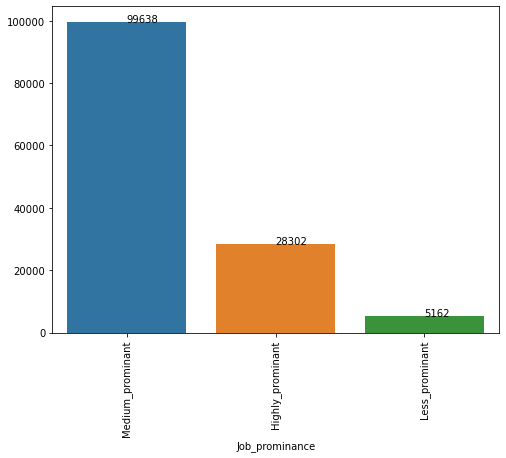

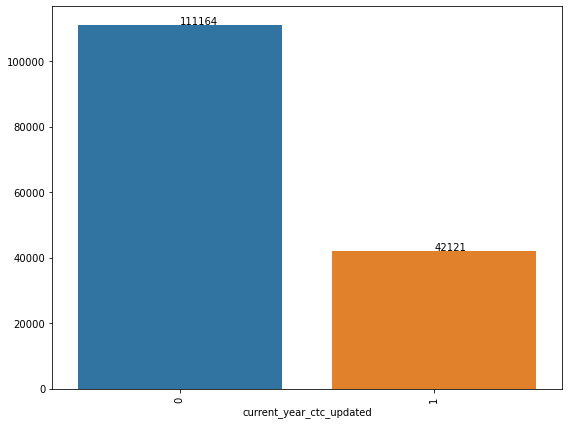

In [536]:
for col in cat_cols:

    groupcol=df_agg.groupby(col).size().sort_values(ascending=False).head(10)
   

    plt.figure(figsize=(8,6))
    #plt.title(i)
    #plt.subplot(4,1,n)
    sns.barplot(x=groupcol.index,y=groupcol.values, order=groupcol.index)
    for index,value in enumerate(groupcol):
        plt.text(index,value,value)
    display(groupcol.to_frame(name='count').reset_index())
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
    
    

plt.show()

<div style="font-size: 20px; text-align: justify;"><br><br><ul><u>Analysis of categorical columns</u></ul><br><br><br>
<li> The dataset has 153443 unique learners.<br><br>
<li> Majority of the learners (22%) are employed at the company 'nvnv wgzohrnvzwj otqcxwto' while 14% work at 'xzegojo' and 10% at 'vbvkgz'.<br><br>
<li> 35% of students are having the current job position as Backend Engineering followed by 16% who are Fullstack Engineers.<br><br>
<li>The joining year of 13.5% employees at their current company is 2016 closely followed by 2018 an 2017.<br><br>
<li>Amost 35% of learners has their CTC updated in the year 2019 and 27% and 24% got their ctc updated in 2021 and 2020 respectively. A total of only 13% students had their ctc updated before the year 2018.<br><br>
<li>50% students are of low income bin, 40% in medium and only 10% learners are of high income bin.<br><br>
<li> 74% employees are in job_positions having medium prominance
     
     
<br><br>
      
     
    
 </div>

<br><br><div style="font-size: 20px; text-align: justify;"><ul>b. Numerical columns analysis.<br><br></div>

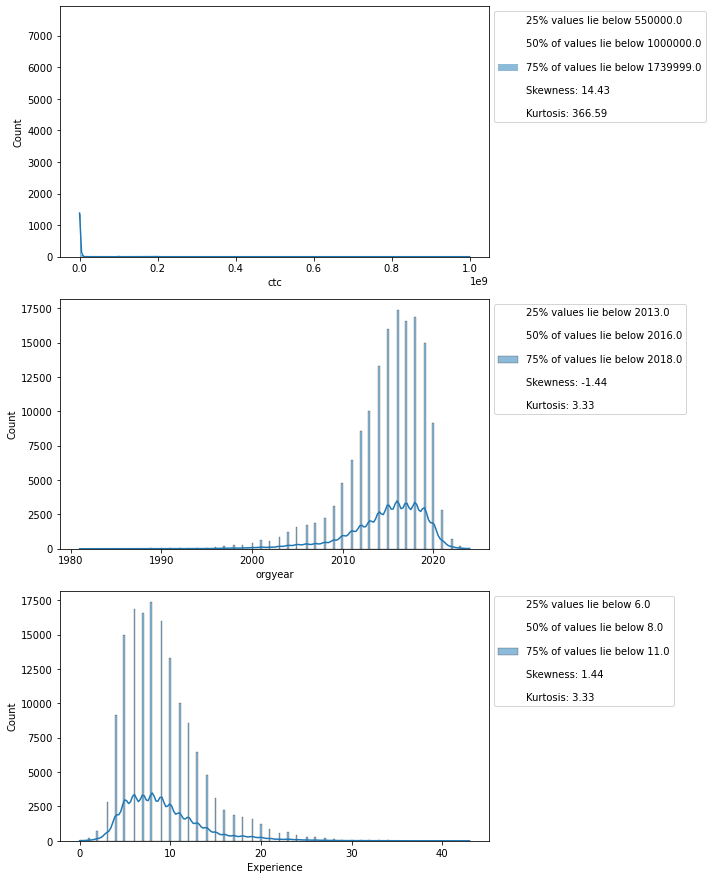

In [537]:
from scipy.stats import skew, kurtosis


hist_cols=[ 'ctc',  'orgyear', 'Experience']
n=1
plt.figure(figsize=(10,20))
for i in hist_cols:
    
    plt.subplot(5,1,n)
    
    sns.histplot(data=df_agg.dropna(subset=[i]), x=i, kde=True,
             label=f'25% values lie below {round(np.percentile(df_agg[i].dropna(), 25), 2)}\n\n'
                   f'50% of values lie below {round(np.percentile(df_agg[i].dropna(), 50), 2)}\n\n'
                   f'75% of values lie below {round(np.percentile(df_agg[i].dropna(), 75), 2)}\n\n'
                   f'Skewness: {np.round(skew(df_agg[i].dropna()), 2)}\n\n'
                   f'Kurtosis: {round(kurtosis(df_agg[i].dropna()), 2)}')

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    n+=1
    
    
plt.tight_layout()
plt.show()
    

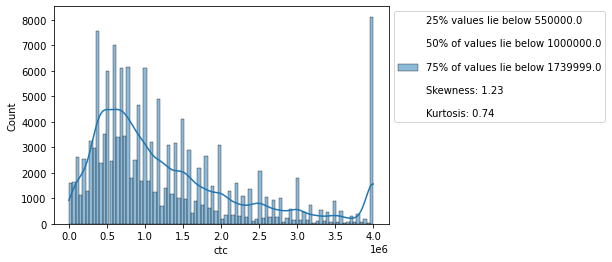

In [538]:
ctc_clipped=np.clip(df_agg['ctc'],np.percentile(df_agg['ctc'].dropna(),0),np.percentile(df_agg['ctc'].dropna(),95))
plt.plot(figsize=(6,6))
#sns.histplot(data=df_agg,x=i,kde=True,label=f'25% values lie below {round(np.percentile(df_agg[i],25),2)}\n\n 50% of valaues lie below {round(np.percentile(df_agg[i],50),2)}\n\n75% of values lie below {round(np.percentile(df_agg[i],75),2)}\n\nSkewness :{ np.round(skew(df_agg[i]),2)}\n\nKurtosis : {round(kurtosis(df_agg[i]),2)}')

sns.histplot(data=ctc_clipped, kde=True,
         label=f'25% values lie below {round(np.percentile(ctc_clipped.dropna(), 25), 2)}\n\n'
               f'50% of values lie below {round(np.percentile(ctc_clipped.dropna(), 50), 2)}\n\n'
               f'75% of values lie below {round(np.percentile(ctc_clipped.dropna(), 75), 2)}\n\n'
               f'Skewness: {np.round(skew(ctc_clipped.dropna()), 2)}\n\n'
               f'Kurtosis: {round(kurtosis(ctc_clipped.dropna()), 2)}')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [539]:
df_agg['Experience'].describe()

count    153285.000000
mean          9.191891
std           4.357146
min           0.000000
25%           6.000000
50%           8.000000
75%          11.000000
max          43.000000
Name: Experience, dtype: float64

<div style="font-size: 20px; text-align: justify;"><br><br><ul><u>Analysis of numerical columns</u></ul><br><br><br>
    
<li>It is clear from the plot that the column ctc is extremely right-skewed. This means that the majority of the data points are concentrated on the left which are lower values , but there are a few outliers or extreme values on the right. The column in also having very high value for kurtosis which means it has heavier tails and a sharper peak around the mean compared to a normal distribution.<br><br>
<li>The values in the column range from 2 to 1.0e+9. Upon removing the outliers in column ctc, we can see 75% of values lie before 1739999. <br><br>
<li> The column orgyear is left skewed with leptokurtic distribution. The values in the column ranges from 1970 to 2024 where 87% of employees joined their current company between 2010 and 2020. <br><br>
<li>Experience of employees ranges from 0 to 54 years where the data is rght skewed and leptokurtic. 75%  of employees are hving experience of below 11 years.<br><br>

     
    
    
    
 </div>

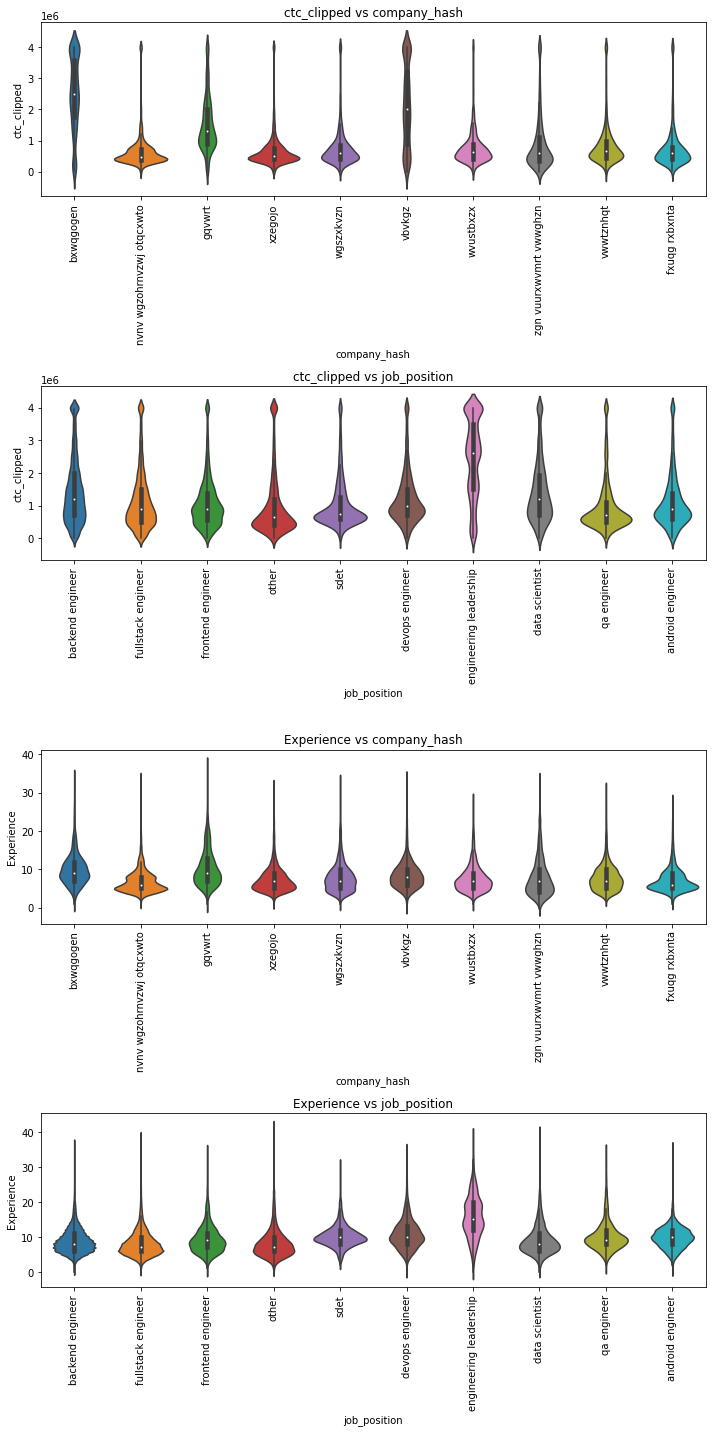

In [540]:
df_agg['ctc_clipped']=np.clip(df_agg['ctc'],np.percentile(df_agg['ctc'].dropna(),0),np.percentile(df_agg['ctc'].dropna(),95))
top_comp=df_agg.groupby('company_hash').size().sort_values(ascending=False).head(10).index
top_job=df_agg.groupby('job_position').size().sort_values(ascending=False).head(10).index

viol_nums=['ctc_clipped','Experience']
viol_cat=[top_comp,top_job]
viol_cat_cols=['company_hash', 'job_position']

n=1
plt.figure(figsize=(10, 20))

for i in viol_nums:
    for j in range(len(viol_cat)):
        filtered_df=df_agg[df_agg[viol_cat_cols[j]].isin(viol_cat[j])]
        plt.subplot(4, 1, n)
        sns.violinplot(x=filtered_df[viol_cat_cols[j]],y=filtered_df[i])  
        plt.title(f'{i} vs {viol_cat_cols[j]}')
        n += 1
        
        plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
    

    

<AxesSubplot:xlabel='orgyear', ylabel='ctc_clipped'>

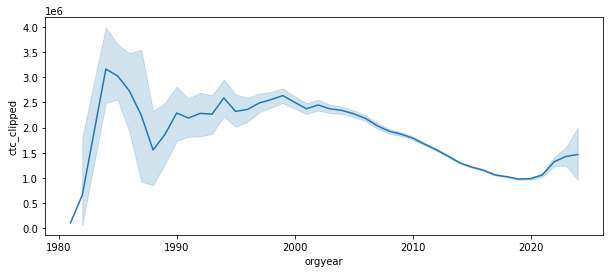

In [541]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df_agg,x='orgyear',y='ctc_clipped')

<div style="font-size: 20px; text-align: justify;"><br><br>
The top 10 employers and job positions are taken for analysis of ctc clipped value and Experience.<br><br><ul>
<li> Most companies give a ctc of below 2000000 to the learners. Companies like 'bxwqgogen' and 'vbvkgz' are seen to give higher ctc to more employees.<br><br>
<li>Higher ctc is given to employees in Engineering Leadership position. All other job positions are given an average ctc of below 3000000.<br><br>
<li> Most learners from all companies are showing an experience of below 20 years. Here learners in Engineering Leadership position seems to have more experience compared to others.<br><br>
    
    
    

</ul>    
</div>

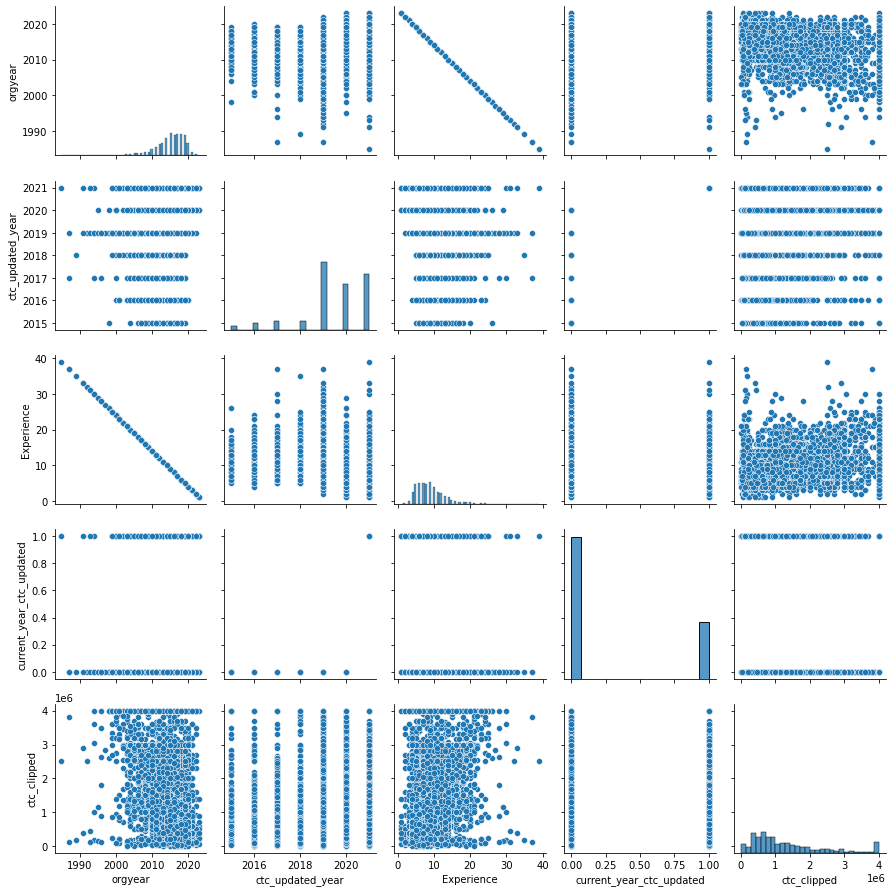

In [542]:
sns.pairplot(df_agg.sample(5000,random_state=30).iloc[:,2:])
plt.tight_layout()
plt.show()

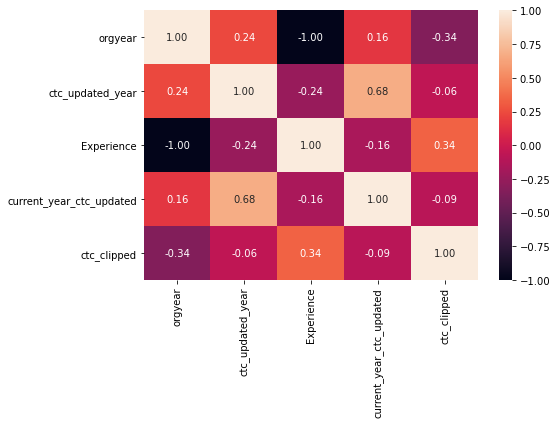

In [543]:
plt.figure(figsize=(8,6))
sns.heatmap(df_agg.iloc[:,2:].corr(), annot=True,fmt='.2f')
plt.tight_layout()
plt.show()
    

<div style="font-size: 20px; text-align: justify;"><br><br>
<li>Experience and orgyear are having high negative correlation as experience increases when the learner has joined the company earlier.<br><br>
<li> There is a positive correlation between ctc and Experience. With increase in experience, employee can demand more ctc.<br><br>
<li> The negative correlation between experience and ctc is because the earlier the employee joins the company, the salary will be more.<br><br>
<br><br>

</div>

In [544]:
df_agg.drop('ctc_clipped',axis=1,inplace=True)

<br><br><br><div style="font-size: 20px; text-align: justify;">5. Detecting and treating outliers in the data.<br><br></div>

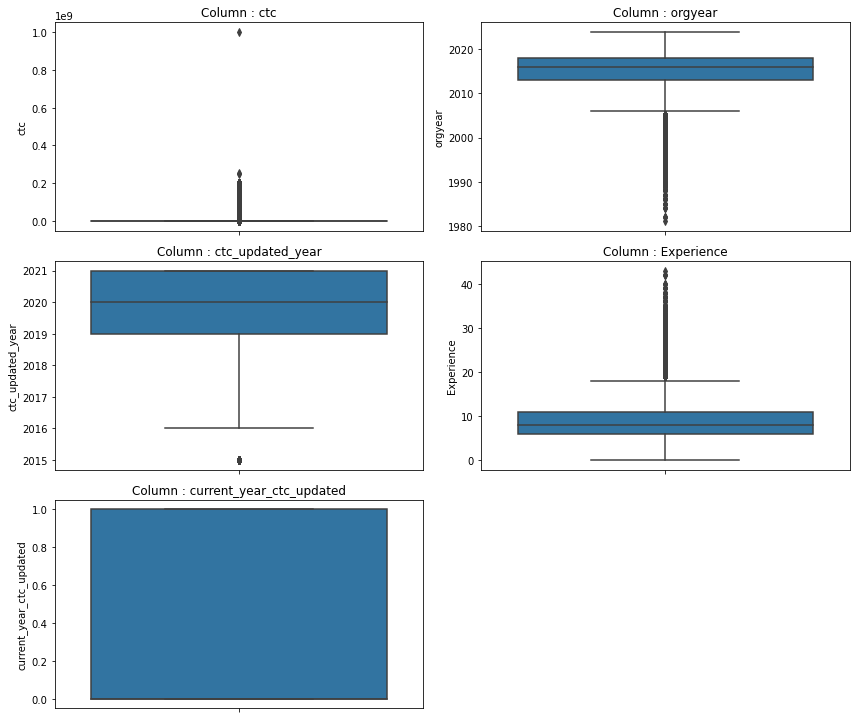

In [545]:
df_agg.columns=df_agg.columns.str.strip()
num_cols=df_agg.select_dtypes(include=['number']).columns


no=1
plt.figure(figsize=(12,20))
for col in num_cols:
    plt.subplot(6,2,no)
    plt.title('Column : ' +col)
    sns.boxplot(y=df_agg[col])
    no+=1
plt.tight_layout()
plt.show()

In [546]:
total=len(df_agg)

for col in num_cols:

    q1=np.percentile(df_agg[col].dropna(),25)
    q3=np.percentile(df_agg[col].dropna(),75)
    l_limit=q1-(1.5*(q3-q1))
    u_limit=q3+(1.5*(q3-q1))

    count=len(df_agg[(df_agg[col]>u_limit) | (df_agg[col]<l_limit)])
    
    print(f"Column: {col}\nlower_limit: {l_limit}\nupper_limit : {u_limit}\nPercentage of outliers: {round((count/total)*100,2)}% \n\n" )

Column: ctc
lower_limit: -1234998.5
upper_limit : 3524997.5
Percentage of outliers: 6.43% 


Column: orgyear
lower_limit: 2005.5
upper_limit : 2025.5
Percentage of outliers: 4.28% 


Column: ctc_updated_year
lower_limit: 2016.0
upper_limit : 2024.0
Percentage of outliers: 1.66% 


Column: Experience
lower_limit: -1.5
upper_limit : 18.5
Percentage of outliers: 4.28% 


Column: current_year_ctc_updated
lower_limit: -1.5
upper_limit : 2.5
Percentage of outliers: 0.0% 




<br><br><br><div style="font-size: 20px; text-align: justify;"><ul>All numerical columns are having outliers with ctc having 6.4% outlier data. Clipping the outliers<br><br></div>

In [547]:
# df_agg['ctc']=np.clip(df_agg['ctc'],np.percentile(df_agg['ctc'].dropna(),0),np.percentile(df_agg['ctc'].dropna(),90))
# df_agg['Experience']=np.clip(df_agg['Experience'],np.percentile(df_agg['Experience'],0),np.percentile(df_agg['Experience'].dropna(),95))
# df_agg['ctc_updated_year']=np.clip(df_agg['ctc_updated_year'],np.percentile(df_agg['ctc_updated_year'],5),np.percentile(df_agg['ctc_updated_year'].dropna(),100))   
# df_agg['orgyear']=np.clip(df_agg['orgyear'],np.percentile(df_agg['orgyear'].dropna(),5),np.percentile(df_agg['orgyear'].dropna(),100)) 

In [548]:
for col in num_cols:

    q1=np.percentile(df_agg[col].dropna(),25)
    q3=np.percentile(df_agg[col].dropna(),75)
    l_limit=q1-(1.5*(q3-q1))
    u_limit=q3+(1.5*(q3-q1))

    df_agg[col]=np.clip(df_agg[col],l_limit,u_limit)

In [549]:
total=len(df_agg)

for col in num_cols:

    q1=np.percentile(df_agg[col].dropna(),25)
    q3=np.percentile(df_agg[col].dropna(),75)
    l_limit=q1-(1.5*(q3-q1))
    u_limit=q3+(1.5*(q3-q1))

    count=len(df_agg[(df_agg[col]>u_limit) | (df_agg[col]<l_limit)])
    
    print(f"Column: {col}\nlower_limit: {l_limit}\nupper_limit : {u_limit}\nPercentage of outliers: {round((count/total)*100,2)}% \n\n" )

Column: ctc
lower_limit: -1234998.5
upper_limit : 3524997.5
Percentage of outliers: 0.0% 


Column: orgyear
lower_limit: 2005.5
upper_limit : 2025.5
Percentage of outliers: 0.0% 


Column: ctc_updated_year
lower_limit: 2016.0
upper_limit : 2024.0
Percentage of outliers: 0.0% 


Column: Experience
lower_limit: -1.5
upper_limit : 18.5
Percentage of outliers: 0.0% 


Column: current_year_ctc_updated
lower_limit: -1.5
upper_limit : 2.5
Percentage of outliers: 0.0% 




<br><br><hr><br>

<div style="font-size: 20px; text-align: justify;"><br><br><br>6.  Encoding categorical values.<br><br></div>

In [550]:
df_agg.select_dtypes(include=['object','datetime'])

,email_hash,company_hash,job_position,Income_bin,Job_prominance
0,00003288036a44374976948c327f246fdbdf0778546904...,bxwqgogen,backend engineer,High,Medium_prominant
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,backend engineer,Low,Medium_prominant
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,fullstack engineer,Medium,Medium_prominant
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,bxwqgotbx wgqugqvnxgz,fullstack engineer,Medium,Medium_prominant
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,fvrbvqn rvmo,NaN,High,NaN
...,...,...,...,...,...
153438,fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...,tqxwoogz ogenfvqt wvbuho,qa engineer,High,Medium_prominant
153439,fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...,trnqvcg,NaN,Medium,NaN
153440,fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...,znn avnv srgmvr atrxctqj otqcxwto,devops engineer,Low,Medium_prominant
153441,ffff49f963e4493d8bbc7cc15365423d84a767259f7200...,zwq wgqugqvnxgz,fullstack engineer,Low,Medium_prominant


In [551]:
df_agg_processed=df_agg.copy(deep=True)

<div style="font-size: 20px; text-align: justify;"><br><br><br>Dropping column email_hash as it is a unique identifier.<br><br></div>

In [552]:
df_agg_processed.drop('email_hash',axis=1,inplace=True)

<div style="font-size: 20px; text-align: justify;"><br><br><br>Implementing Target Encoding for company_hash and job_position.<br><br></div>

In [553]:
import category_encoders as ce


target_enc = ce.TargetEncoder(cols=['job_position', 'company_hash'], smoothing=0.3)
df_agg_processed[['job_position_encoded', 'company_hash_encoded']] = target_enc.fit_transform(df_agg[['job_position', 'company_hash']], df_agg['ctc'])


In [554]:
df_agg_processed.head()

,ctc,company_hash,job_position,orgyear,ctc_updated_year,Experience,Income_bin,Job_prominance,current_year_ctc_updated,job_position_encoded,company_hash_encoded
0,3500000.0,bxwqgogen,backend engineer,2012.0,2019.0,12.0,High,Medium_prominant,0,1.439809e+06,2.411319e+06
1,250000.0,nqsn axsxnvr,backend engineer,2013.0,2020.0,11.0,Low,Medium_prominant,0,1.439809e+06,1.274645e+06
2,1300000.0,gunhb,fullstack engineer,2021.0,2019.0,3.0,Medium,Medium_prominant,0,1.149698e+06,1.446000e+06
3,2000000.0,bxwqgotbx wgqugqvnxgz,fullstack engineer,2005.5,2021.0,18.5,Medium,Medium_prominant,1,1.149698e+06,1.274645e+06
4,3400000.0,fvrbvqn rvmo,NaN,2009.0,2018.0,15.0,High,NaN,0,1.233228e+06,2.388437e+06


In [555]:
df_agg_processed.drop(['job_position','company_hash'],axis=1,inplace=True)

<div style="font-size: 20px; text-align: justify;"><br><br><br>Dropping columns Income bin,job prominance and current_year_ctc_updated as it may generalise the data.<br><br></div>

In [556]:
df_agg_processed.drop(['Income_bin','Job_prominance' , 'current_year_ctc_updated'],axis=1,inplace=True)

In [557]:
df_agg_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153285 entries, 0 to 153442
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ctc                   153285 non-null  float64
 1   orgyear               153285 non-null  float64
 2   ctc_updated_year      153285 non-null  float64
 3   Experience            153285 non-null  float64
 4   job_position_encoded  153285 non-null  float64
 5   company_hash_encoded  153285 non-null  float64
dtypes: float64(6)
memory usage: 12.2 MB


<br><br><hr><br>

<div style="font-size: 20px; text-align: justify;"><br><br>7. Scaling data and Filling missing values. <br><br></div>


<div style="font-size: 20px; text-align: justify;"><br><ul>Columns 'job_position' is having 25% missing values. 'orgyear' and 'company_hash' are also having null values. Using Standard Scalar to scale the data and KNN Imputer to fill the missing values.  <br><br></div>


In [558]:

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler




num_cols = df_agg_processed.select_dtypes(include=[np.number])


stdscaler = StandardScaler()
num_cols_std = stdscaler.fit_transform(num_cols)


imputer = KNNImputer(n_neighbors=5)
num_cols_imp = imputer.fit_transform(num_cols_std)


#num_cols_imp= stdscaler.inverse_transform(num_cols_imp)
num_cols_imp_df = pd.DataFrame(num_cols_imp, columns=num_cols.columns)

df_agg_processed = num_cols_imp_df

df_agg_processed.head()

,ctc,orgyear,ctc_updated_year,Experience,job_position_encoded,company_hash_encoded
0,2.316688,-0.767619,-0.384918,0.767619,0.513360,2.564056
1,-1.066698,-0.508776,0.371141,0.508776,0.513360,-0.107703
2,0.026396,1.561971,-0.384918,-1.561971,-0.396470,0.295069
3,0.755125,-2.450101,1.127200,2.450101,-0.396470,-0.107703
4,2.212584,-1.544149,-1.140976,1.544149,-0.134507,2.510274


In [559]:
(df_agg_processed.isna().sum(axis=0)/len(df_agg_processed))*100

ctc                     0.0
orgyear                 0.0
ctc_updated_year        0.0
Experience              0.0
job_position_encoded    0.0
company_hash_encoded    0.0
dtype: float64

<div style="font-size: 20px; text-align: justify;"><br><br>8.  Data Preprocessing. <br><br></div>


<div style="font-size: 20px; text-align: justify;"><br><br><ul>a. Train-test split.<br><br></ul></div>

In [560]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_agg_processed, test_size=0.2, random_state=42)


In [561]:
X_train.shape, X_test.shape

((122628, 6), (30657, 6))

In [562]:
Xtrain_copy=X_train.copy(deep=True)

<br><br><hr><br>

<div style="font-size: 20px; text-align: justify;"><br><br>9.   K means clustering <br><br></div>


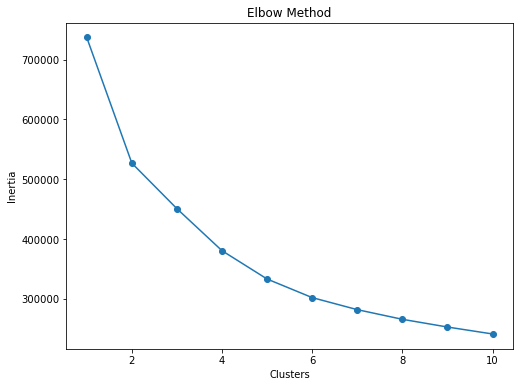

In [563]:
from sklearn.cluster import KMeans

result=[]

for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=42,n_init=10)
    kmeans.fit(X_train)
    result.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1,11),result,marker='o')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

<div style="font-size: 20px; text-align: justify;"><br><br><ul>Elbow method is used to assess the optimum number of clusters. Here at 3 or 4 clusters, inertia starts to slow down So this may be the optimum number.<br><br></ul></div>

In [564]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X_train)


KMeans(n_clusters=4, n_init=10, random_state=42)

In [565]:
kmlabels = kmeans.labels_
inertia = kmeans.inertia_
print(f"Inertia : {inertia}")

Inertia : 380399.9771415807


In [566]:
from sklearn.metrics import silhouette_score



silhouette_avg = silhouette_score(X_train, kmlabels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.28428528656538504


In [567]:
overall_mean = np.mean(X_train.values.flatten())
tss = np.sum((X_train.values.flatten() - overall_mean) ** 2)
wcss = kmeans.inertia_
bcss = tss - wcss
print(f"Between-Cluster Sum of Squares (BCSS): {bcss}")


Between-Cluster Sum of Squares (BCSS): 356842.88322578516


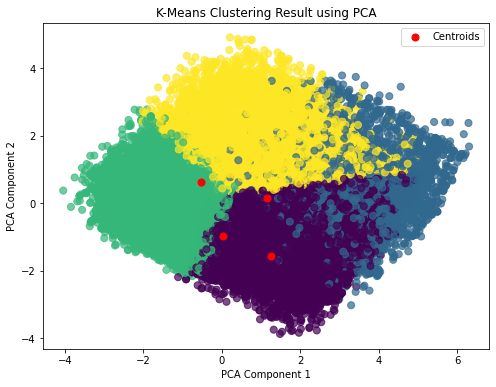

In [568]:
from sklearn.decomposition import PCA

pca = PCA(2) 
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmlabels, s=50, alpha=0.7)  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='.', s=200, label='Centroids')  
plt.title('K-Means Clustering Result using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [569]:
# from sklearn.manifold import TSNE


# tsne = TSNE(n_components=2, random_state=42)
# X_tsne = tsne.fit_transform(X_train)


# plt.figure(figsize=(8, 6))
# plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmlabels, s=50, alpha=0.7, cmap='viridis')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='.', s=200, label='Centroids')
# plt.title('K-Means Clustering Result using t-SNE')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.legend()
# plt.show()


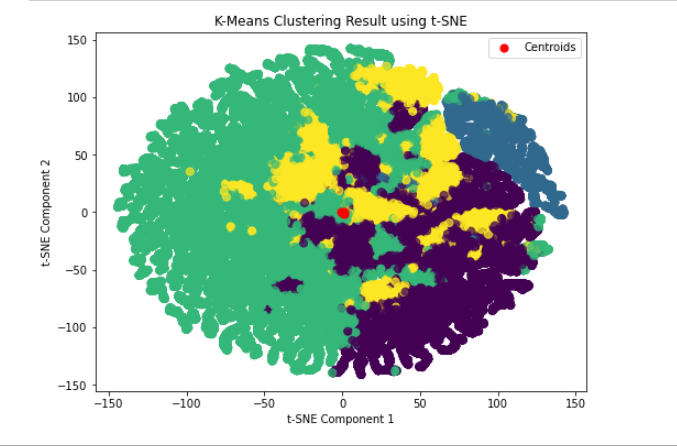

In [570]:

# import umap

# reducer = umap.UMAP(n_components=2)
# X_umap = reducer.fit_transform(X_train)

# plt.figure(figsize=(8, 6))
# plt.scatter(X_umap[:, 0], X_umap[:, 1], c=kmlabels, s=50, alpha=0.7, cmap='viridis')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='.', s=200, label='Centroids')
# plt.title('K-Means Clustering Result using UMAP')
# plt.xlabel('UMAP Component 1')
# plt.ylabel('UMAP Component 2')
# plt.legend()
# plt.show()


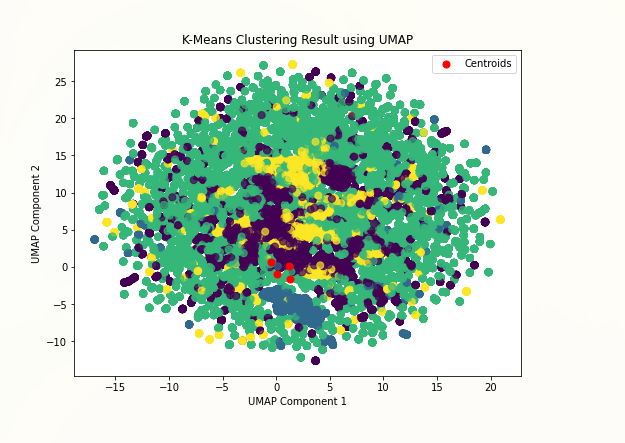

In [571]:
kmeans.fit(df_agg_processed)

df_agg['Kmeans_clusters']=kmeans.labels_
df_agg.head()

,email_hash,ctc,company_hash,job_position,orgyear,ctc_updated_year,Experience,Income_bin,Job_prominance,current_year_ctc_updated,Kmeans_clusters
0,00003288036a44374976948c327f246fdbdf0778546904...,3500000.0,bxwqgogen,backend engineer,2012.0,2019.0,12.0,High,Medium_prominant,0,0
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,250000.0,nqsn axsxnvr,backend engineer,2013.0,2020.0,11.0,Low,Medium_prominant,0,2
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,1300000.0,gunhb,fullstack engineer,2021.0,2019.0,3.0,Medium,Medium_prominant,0,1
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2000000.0,bxwqgotbx wgqugqvnxgz,fullstack engineer,2005.5,2021.0,18.5,Medium,Medium_prominant,1,2
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,3400000.0,fvrbvqn rvmo,NaN,2009.0,2018.0,15.0,High,NaN,0,0


In [572]:
df_agg['Kmeans_clusters'].value_counts()

1    78076
2    41543
0    25486
3     8180
Name: Kmeans_clusters, dtype: int64

<AxesSubplot:xlabel='Kmeans_clusters', ylabel='ctc'>

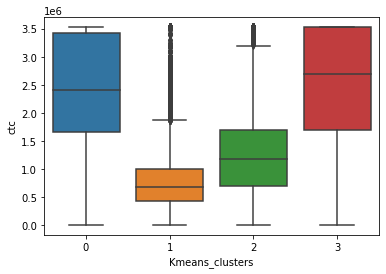

In [573]:
sns.boxplot(data=df_agg,x='Kmeans_clusters',y='ctc')

<AxesSubplot:xlabel='Kmeans_clusters', ylabel='Experience'>

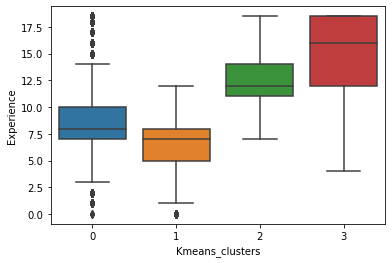

In [574]:
sns.boxplot(data=df_agg,x='Kmeans_clusters',y='Experience')

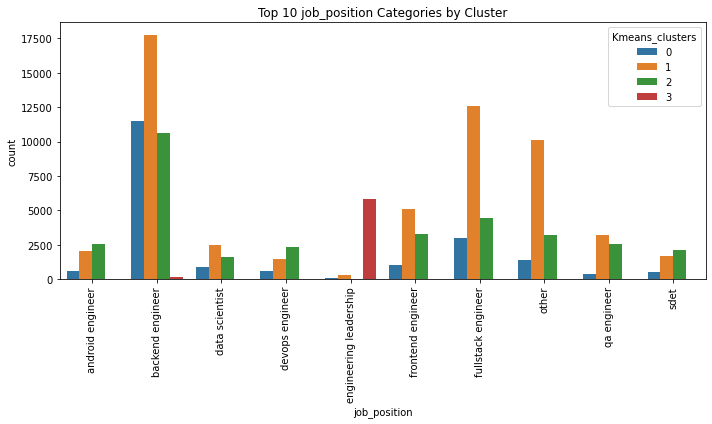

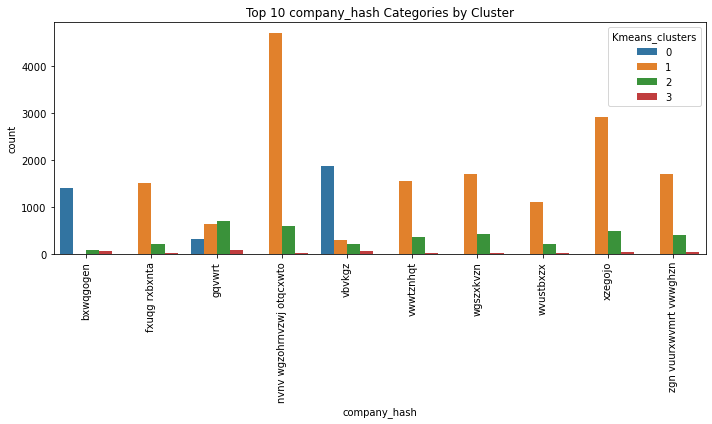

In [575]:
for col in ['job_position', 'company_hash']:

    top_categories = df_agg[col].value_counts().nlargest(10).index
    groupcol = df_agg[df_agg[col].isin(top_categories)].groupby([col, 'Kmeans_clusters']).size().reset_index(name='count')
 

    plt.figure(figsize=(10, 6))
    sns.barplot(x=col, y='count', hue='Kmeans_clusters', data=groupcol)
    
 

    plt.title(f'Top 10 {col} Categories by Cluster')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


<div style="font-size: 20px; text-align: justify;"><br><br>
<li>Kmeans could not produce meaningful clusters. Relatively low silhouette score indicates that the clusters are not well-separated. BCSS score is moderately high.<br><br>
<li> Clusetr having low ctc and low experience is highest number of values followed by cluster with  moderate ctc and higher experience. Cluster having high ctc and Experience has least values.<br><br>
<li>In the Cluster having high ctc and moderate experience (7 to 10 years).Most of the employees work as Backend Engineers<br><br>
<li>Next Cluster has employees with Low ctc and low experience. Most of them work as Backend and Fullstack engineers. High number of cluster employees work at company 'nvnv wgzohrnvzwj otqcxwto'. <br><br>
<li>Cluster with employees have moderate ctc and higher experience mostly work as Backend and full stack engineeers.<br><br>
<li>Cluster employees have very high ctc and Experience. They work in mostly Engineering Leadership roles. <br><br>
    
    
    
<br><br>
   
</div>

<div style="font-size: 20px; text-align: justify;"><br><br><br>10. Using Agglomerative Clustering.<br><br></div>

<div style="font-size: 20px; text-align: justify;"><br><br><br>Visualization using Dendogram to determine number of clusters.<br><br></div>

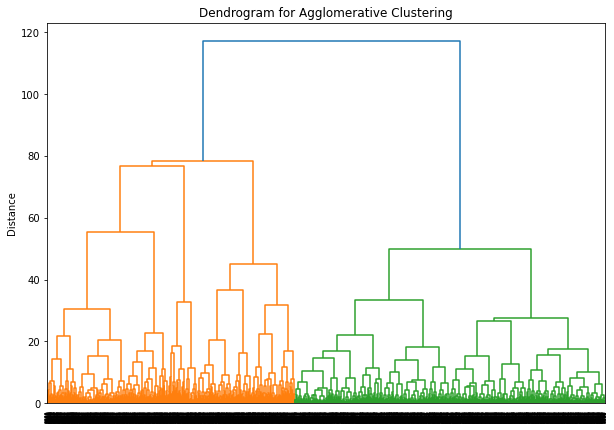

In [576]:

# from scipy.cluster.hierarchy import dendrogram, linkage

# np.random.seed(42)
# sample_size = 5000  
# random_indices = np.random.choice(X_train.shape[0], size=sample_size, replace=False)
# X_sample = X_train.iloc[random_indices, :]  

# linked = linkage(X_sample, method='ward')


# plt.figure(figsize=(10, 7))
# dendrogram(linked,
#            orientation='top',
#            distance_sort='descending',
#            show_leaf_counts=False)
# plt.title('Dendrogram for Agglomerative Clustering')

# plt.ylabel('Distance')
# plt.show()


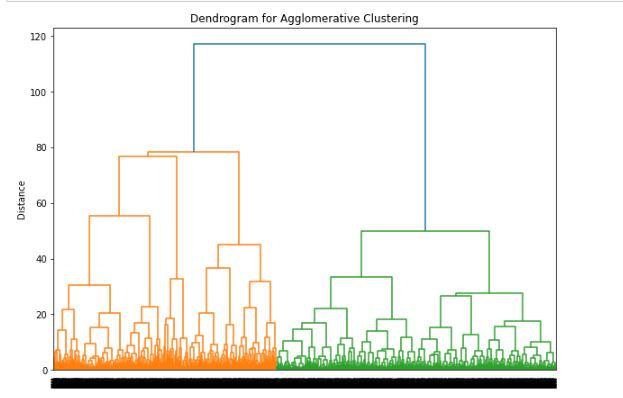

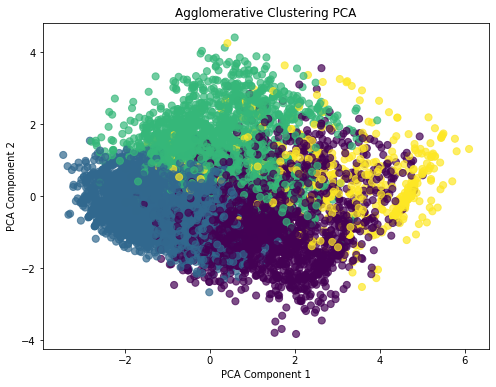

In [586]:
from sklearn.cluster import AgglomerativeClustering

np.random.seed(42)


sample_size = 10000  
random_indices = np.random.choice(X_train.index, size=sample_size, replace=False)  
X_sample = X_train.loc[random_indices, :] 


agg_clustering = AgglomerativeClustering(n_clusters=4,  linkage='ward')
agglabels = agg_clustering.fit_predict(X_sample)


pca = PCA(2)  
X_pca = pca.fit_transform(X_sample)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agglabels, cmap='viridis', s=50, alpha=0.7)
plt.title('Agglomerative Clustering PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [578]:

silhouette_avg = silhouette_score(X_sample, agglabels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.271090819316899


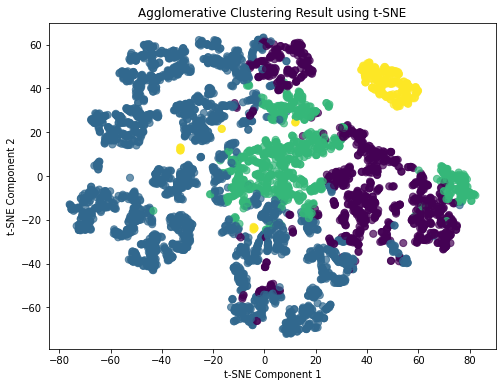

In [579]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_sample)


plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=agglabels, s=50, alpha=0.7, cmap='viridis')

plt.title('Agglomerative Clustering Result using t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.show()


In [587]:
label_map = pd.Series(agglabels, index=X_sample.index)

df_agg['Agg_Cluster_Labels'] = df_agg.index.map(label_map)

df_agg.head()


,email_hash,ctc,company_hash,job_position,orgyear,ctc_updated_year,Experience,Income_bin,Job_prominance,current_year_ctc_updated,Kmeans_clusters,Agg_Cluster_Labels
0,00003288036a44374976948c327f246fdbdf0778546904...,3500000.0,bxwqgogen,backend engineer,2012.0,2019.0,12.0,High,Medium_prominant,0,0,NaN
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,250000.0,nqsn axsxnvr,backend engineer,2013.0,2020.0,11.0,Low,Medium_prominant,0,2,NaN
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,1300000.0,gunhb,fullstack engineer,2021.0,2019.0,3.0,Medium,Medium_prominant,0,1,NaN
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2000000.0,bxwqgotbx wgqugqvnxgz,fullstack engineer,2005.5,2021.0,18.5,Medium,Medium_prominant,1,2,NaN
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,3400000.0,fvrbvqn rvmo,NaN,2009.0,2018.0,15.0,High,NaN,0,0,NaN


In [581]:
df_agg['Agg_Cluster_Labels'].value_counts()

1.0    2782
0.0    1081
2.0     878
3.0     255
Name: Agg_Cluster_Labels, dtype: int64

<AxesSubplot:xlabel='Agg_Cluster_Labels', ylabel='ctc'>

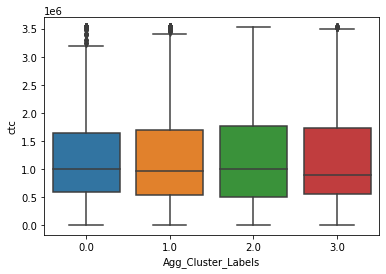

In [582]:
sns.boxplot(data=df_agg,x='Agg_Cluster_Labels',y='ctc')

<AxesSubplot:xlabel='Agg_Cluster_Labels', ylabel='Experience'>

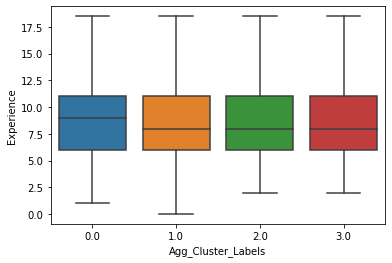

In [583]:
sns.boxplot(data=df_agg,x='Agg_Cluster_Labels',y='Experience')

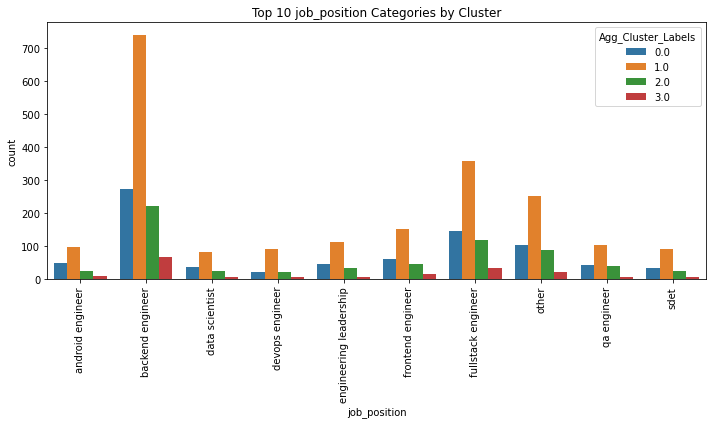

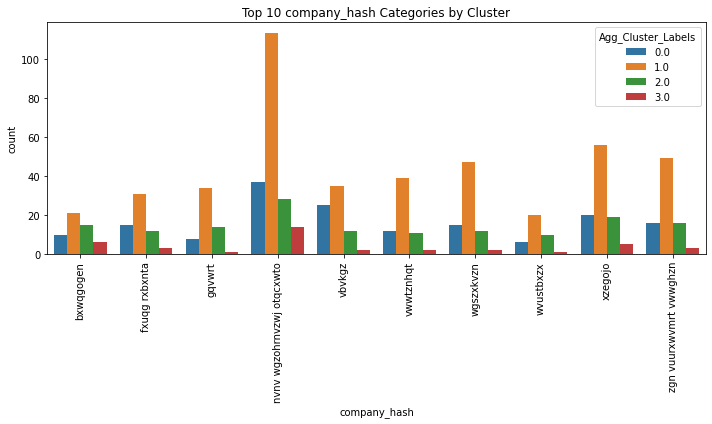

In [584]:
for col in ['job_position', 'company_hash']:

    top_categories = df_agg[col].value_counts().nlargest(10).index
    groupcol = df_agg[df_agg[col].isin(top_categories)].groupby([col, 'Agg_Cluster_Labels']).size().reset_index(name='count')
    

    plt.figure(figsize=(10, 6))
    sns.barplot(x=col, y='count', hue='Agg_Cluster_Labels', data=groupcol)
    
 

    plt.title(f'Top 10 {col} Categories by Cluster')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


<div style="font-size: 20px; text-align: justify;"><br><br>
Agglomerative clustering also has  low silhouette score of 0.18 indicates that the clusters are not well-separated.
Couldnot see distinction between clusters while analysing using ctc, experience and other columns. <br><br>
    
    
    
<br><br>
   
</div>

<br><hr><br>

<div style="font-size: 25px; text-align: justify;"><br><br><ul>Insights</ul>
<hr></div>


<div style="font-size: 20px; text-align: justify;"><br><br><li> The dataset has 153443 unique learners.<br><br>
<li> Majority of the learners (22%) are employed at the company 'nvnv wgzohrnvzwj otqcxwto' while 14% work at 'xzegojo' and 10% at 'vbvkgz'.<br><br>
<li> 35% of students are having the current job position as Backend Engineering followed by 16% who are Fullstack Engineers.<br><br>
<li>The joining year of 13.5% employees at their current company is 2016 closely followed by 2018 an 2017.<br><br>
<li>Amost 35% of learners has their CTC updated in the year 2019 and 27% and 24% got their ctc updated in 2021 and 2020 respectively. A total of only 13% students had their ctc updated before the year 2018.<br><br>
<li>50% students are of low income bin, 40% in medium and only 10% learners are of high income bin.<br><br>
<li> 74% employees are in job_positions having medium prominance<br><br>

<li>It is clear from the plot that the column ctc is extremely right-skewed. This means that the majority of the data points are concentrated on the left which are lower values , but there are a few outliers or extreme values on the right. The column in also having very high value for kurtosis which means it has heavier tails and a sharper peak around the mean compared to a normal distribution.<br><br>
<li>The values in the column range from 2 to 1.0e+9. Upon removing the outliers in column ctc, we can see 75% of values lie before 1739999. <br><br>
<li> The column orgyear is left skewed with leptokurtic distribution. The values in the column ranges from 1970 to 2024 where 87% of employees joined their current company between 2010 and 2020. <br><br>
<li>Experience of employees ranges from 0 to 54 years where the data is rght skewed and leptokurtic. 75%  of employees are hving experience of below 11 years.<br><br>
<li> Most companies give a ctc of below 2000000 to the learners. Companies like 'bxwqgogen' and 'vbvkgz' are seen to give higher ctc to more employees.<br><br>
<li>Higher ctc is given to employees in Engineering Leadership position. All other job positions are given an average ctc of below 3000000.<br><br>
<li> Most learners from all companies are showing an experience of below 20 years. Here learners in Engineering Leadership position seems to have more experience compared to others.<br><br>
<li>Experience and orgyear are having high negative correlation as experience increases when the learner has joined the company earlier.<br><br>
<li> There is a positive correlation between ctc and Experience. With increase in experience, employee can demand more ctc.<br><br>
<li> The negative correlation between experience and ctc is because the earlier the employee joins the company, the salary will be more.<br><br>
<br><br>
 
<br>The clustering algorithms were not able to produce clearly seperated clusters.
 <ul>   
<br><br><u>K Means Clustering Outcome</u><br><br>
<li>Kmeans could not produce meaningful clusters. Relatively low silhouette score indicates that the clusters are not well-separated. BCSS score is moderately high.<br><br>
<li> Clusetr having low ctc and low experience is highest number of values followed by cluster with  moderate ctc and higher experience. Cluster having high ctc and Experience has least values.<br><br>
<li>In the Cluster having high ctc and moderate experience (7 to 10 years).Most of the employees work as Backend Engineers<br><br>
<li>Next Cluster has employees with Low ctc and low experience. Most of them work as Backend and Fullstack engineers. High number of cluster employees work at company 'nvnv wgzohrnvzwj otqcxwto'. <br><br>
<li>Cluster with employees have moderate ctc and higher experience mostly work as Backend and full stack engineeers.<br><br>
<li>Cluster employees have very high ctc and Experience. They work in mostly Engineering Leadership roles. <br><br></ul>
    
    
 <br><br>


     

      
     
    
 </div>

<div style="font-size: 25px; text-align: justify;"><br><br><ul>Recommendations</ul>
<hr></div>

<div style="font-size: 20px; text-align: justify;"><br><br><li> Students of Cluster having Low CTC and  Moderate Experience will be freshers or of young demography.They be can offered specialized training on emerging technologies and domains having future opportunities that will help them to transition their career to fields having higher compensation.<br><br>
<li>Cluster members having Moderate CTC and  High Experience can be helped to achieve job roles in leadership positions or senior technical roles and train them to gain technical expertise.As they are of older demography aligning them with recent market trends and latest technologies is very important.They also need to be mentored on effectively communicating their experience and skills to negotiate higher salaries<br><br>
<li>Segment with High CTC and  Moderate Experience can be given programs on Advanced technical skills which can help these learners  to take  more leadership roles. <br><br>
<li>Cluster having very High CTC and high Experience can be provided training on  leadership programs, technical decision-making courses and management courses. Mentoring roles could be introduced for this highly experienced group. They  need to be taught programs on latest technologies related to the course they have opted for.<br><br>
<li> As Companies like 'vbvkgz' and 'bxwqgogen' offer higher CTC to their employees. Scaler can strengthen partnerships with these companies, providing learners with more internship and job placement opportunities.<br><br>
<li> With 50% of learners in the low-income bin, Scaler can offer lessons or mentorship on how to negotiate for better salary and provide resources to transition into higher-paying roles. They can also connect learners to companies known for offering higher compensation, like 'bxwqgogen' and 'vbvkgz'.<br><br>
<li> Since a significant portion of learners are Backend Engineers and  Fullstack Engineers, Scaler can create highly specialized tracks focused on Backend and Fullstack development. Offering advanced topics and very latest technical knowledge can help these learners further their careers.<br><br>


        
 </div>